## KONLPy 설치 방법
- 'Konlpy 오류시 참고'로 검색
- jpype download(https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype)
- 본인의 파이썬 버전에 맞게 설치(예:Python 3.8)
- version: JPype1-1.1.2-cp38-cp38-win_amd64.whl
- download 프로그램이 있는 디렉토리로 이동
- pip install JPype1-1.1.2-cp38-cp38-win_amd64.whl
- pip install konlpy

In [2]:
import konlpy

In [3]:
konlpy.__version__

'0.5.2'

In [4]:
from konlpy.tag import Okt   # OKt: Open Korean text
okt = Okt()

In [5]:
okt.nouns('해당 에러가 발생하는 것을 알 수 있다')   # 명사 추출

['해당', '에러', '발생', '것', '알', '수']

### 여친 선물- 워드 클라우드 만들기

In [ ]:
# 웹크롤링으로 할 때에는 이렇게,,
# import time
# from selenium import webdriver
# from selenium.webdriver.common.keys
# import Keys

# from urllib.parse import quote
# import math

# driver = webdriver.Chrome('../05.Crawling/chromedriver')

In [9]:
with open('data/gift.txt', 'r', encoding='utf-8') as f:
    gift_text = f.read()

In [10]:
tokens = okt.nouns(gift_text)
tokens[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '신지', '몇개', '추천', '제품']

In [11]:
# 영문자, 숫자 제거
import re  # re: regular expression(정규 표현식)
new_tokens = []
for token in tokens:
    text = re.sub('[A-Za-z0-9]','',token)
    new_tokens.append(text)

In [18]:
len(new_tokens)

24139

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#한글폰트 사용
mpl.rc('font', family='NanumBarunpen')
mpl.rc('axes', unicode_minus=False)

In [22]:
import nltk

- 아래 두 셀을 반복해서 실행하여 stop_words를 갱신하다

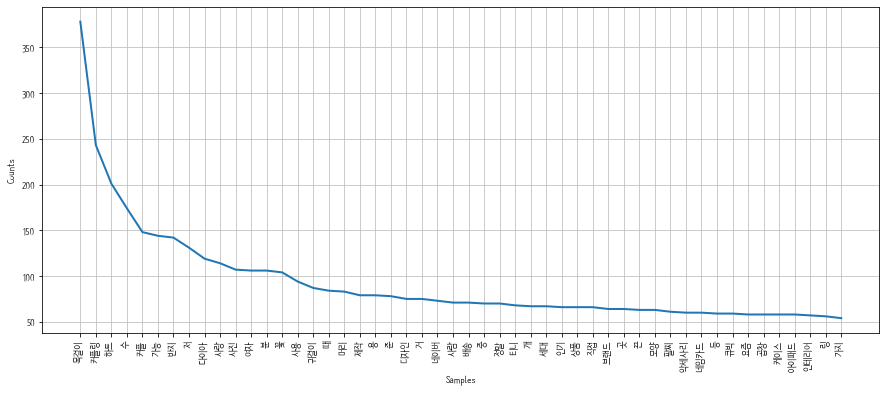

In [27]:
gf_gift = nltk.Text(new_tokens, name='Girlfriend Gift')
plt.figure(figsize=(15,6))
gf_gift.plot(50)
plt.show()

In [24]:
stop_words=['선물','추천','것','가격','여친','제품','여자친구','제','요','더', '고급', '판매', '참고', '하나', '해', '한번', '지금', '센스', '의미', '감동', '구매', '심플', '가장', '여성', '정보', '부담', '선택', '마감', '오늘', '그냥', '생각', '후기']
new_tokens=[word for word in new_tokens if word not in stop_words]
new_tokens[:10]

- 워드 클라우드 그리기

In [26]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud

In [31]:
data=gf_gift.vocab().most_common(300)
wc=WordCloud(
    font_path='C:/windows/fonts/malgun.ttf',
    relative_scaling=0.2,
    background_color='white'
).generate_from_frequencies(dict(data))

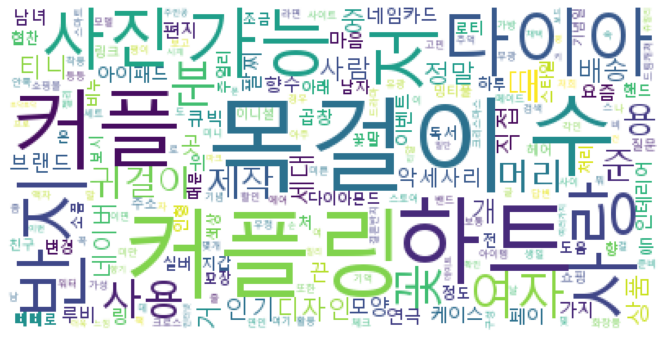

In [32]:
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis('off')
plt.show()

- 하트 그림에 표시하기

In [33]:
mask=np.array(Image.open('data/heart.jpg'))
from wordcloud import ImageColorGenerator
image_colors=ImageColorGenerator(mask)

In [38]:
wc=WordCloud(
    font_path='C:/windows/fonts/malgun.ttf',
    relative_scaling=0.3,
    mask=mask,
    background_color='white',
    min_font_size=1, max_font_size=100
).generate_from_frequencies(dict(data))

dafault_colors = wc.to_array()

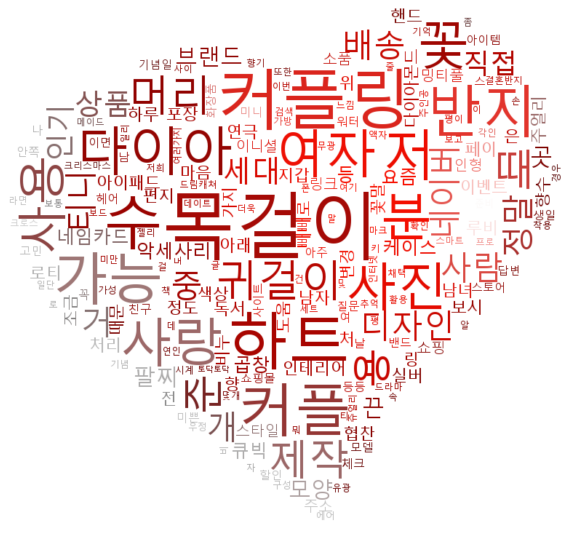

In [36]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors),interpolation='bilinear')
plt.axis('off')
plt.show()